## 实现混淆矩阵，精准率和召回率

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [3]:
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [6]:
y_log_predict = log_reg.predict(X_test)

In [7]:
def TN(y_true, y_predict):
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [8]:
def FP(y_true, y_predict):
    return np.sum((y_true == 0) & (y_predict == 1))
FP(y_test, y_log_predict)

2

In [9]:
def FN(y_true, y_predict):
    return np.sum((y_true == 1) & (y_predict == 0))
FN(y_test, y_log_predict)

9

In [10]:
def TP(y_true, y_predict):
    return np.sum((y_true == 1) & (y_predict == 1))
TP(y_test, y_log_predict)

36

In [11]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)],
    ])

In [12]:
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [13]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
precision_score(y_test, y_log_predict)

0.9473684210526315

In [14]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
recall_score(y_test, y_log_predict)

0.8

## scikit-learn中混淆矩阵，精准率和召回率

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [16]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [17]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

## F1 Score

In [18]:
import numpy as np

In [19]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [20]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [21]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [22]:
 from sklearn import datasets
    
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [25]:
y_predict = log_reg.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [27]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [28]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [29]:
f1_score(precision_score(y_test, y_predict), recall_score(y_test, y_predict))

0.8674698795180723

In [30]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [31]:
log_reg.decision_function(X_test)

array([-22.05698725, -33.02939495, -16.21334121, -80.37917042,
       -48.2512645 , -24.54006348, -44.39170806, -25.04294226,
        -0.9782879 , -19.71746373, -66.25140453, -51.09601386,
       -31.49348035, -46.05335843, -38.67874507, -29.80472269,
       -37.58848499, -82.57568692, -37.81906053, -11.01163868,
        -9.174409  , -85.13003996, -16.71615028, -46.23722893,
        -5.32992872, -47.91763636, -11.66730877, -39.19605057,
       -25.25294288, -14.36646469, -16.9978418 , -28.91905902,
       -34.339415  , -29.47607259,  -7.85812234,  -3.82093805,
       -24.08162914, -22.16363101, -33.61217955, -23.14022167,
       -26.91804451, -62.38937099, -38.85688826, -66.77259095,
       -20.14480936, -17.47886059, -18.06799221, -22.22225722,
       -29.62304831, -19.73172021,   1.49552705,   8.32081699,
       -36.29309473, -42.5073202 , -25.90459845, -34.98960925,
        -8.42011491, -50.04728392, -51.4820801 ,  19.88959855,
        -8.91886958, -31.99343309, -11.66098615,  -0.47

In [32]:
log_reg.decision_function(X_test)[:10]

array([-22.05698725, -33.02939495, -16.21334121, -80.37917042,
       -48.2512645 , -24.54006348, -44.39170806, -25.04294226,
        -0.9782879 , -19.71746373])

In [33]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
decision_scores = log_reg.decision_function(X_test)

In [35]:
np.min(decision_scores)

-85.68607424384463

In [36]:
np.max(decision_scores)

19.88959854604057

In [37]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [38]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [39]:
precision_score(y_test, y_predict_2)

0.96

In [40]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [41]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [42]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]])

In [43]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [44]:
recall_score(y_test, y_predict_3)

0.8888888888888888

In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

In [46]:
import matplotlib.pyplot as plt

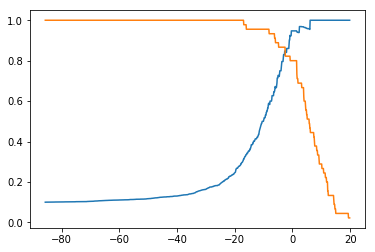

In [47]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

## Precision-Recall 曲线

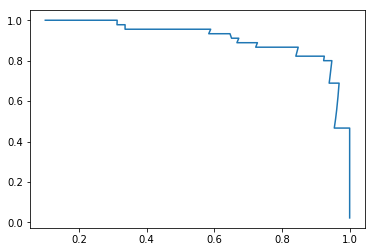

In [48]:
plt.plot(precisions, recalls)
plt.show()

## scikit-learn中的Precision-Recall曲线

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [50]:
precisions.shape

(145,)

In [51]:
recalls.shape

(145,)

In [52]:
thresholds.shape

(144,)

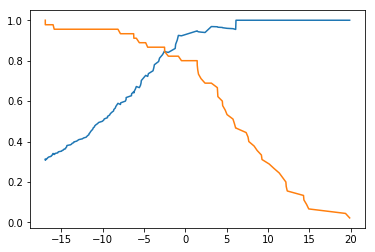

In [53]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

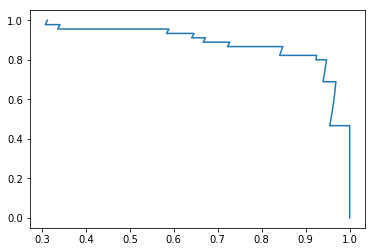

In [54]:
plt.plot(precisions, recalls)

## ROC曲线

In [55]:
from kNN.metrics import FPR, TPR

fprs = []
tprs = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

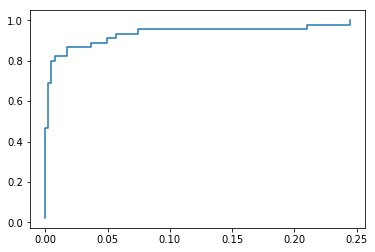

In [56]:
plt.plot(fprs, tprs)
plt.show()

## scikit-learn中的ROC

In [57]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds =roc_curve(y_test, decision_scores)

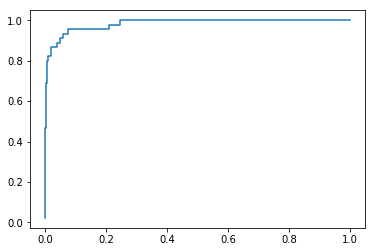

In [58]:
plt.plot(fprs, tprs)
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

## 多分类问题中的混淆矩阵

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state= 666)

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.93115438108484

In [64]:
y_predict = log_reg.predict(X_test)

In [65]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average="micro")

0.93115438108484

In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]])

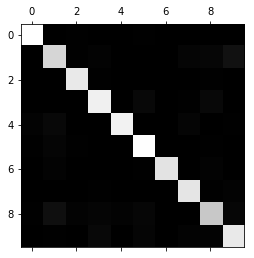

In [67]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [68]:
row_sums = np.sum(cfm, axis = 1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

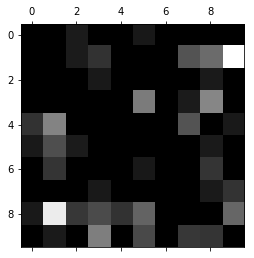

In [69]:
plt.matshow(err_matrix, cmap = plt.cm.gray)
plt.show()